In [612]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder , OneHotEncoder,QuantileTransformer, Imputer
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import grid_search
from sklearn.model_selection import cross_val_score
import sklearn.cross_validation as cv
import seaborn as sns
import matplotlib
from sklearn.metrics import mean_squared_error

In [613]:
#Load Data

df = pd.read_csv('train_clean.csv')
df = df.drop(df.columns[0], axis=1)
tf = pd.read_csv('test_clean.csv')
tf = tf.drop(tf.columns[0], axis=1)



In [614]:
#Separate X_train y_train and y_test
y_train = df['SalesPrice']
X_train = df.drop('SalesPrice', axis=1)
X_test = tf.copy()

del df,tf


In [615]:
# Trying Random Forest Regression Model
Model_Random_Forest = RandomForestRegressor(n_estimators=100)

In [616]:
Model_Random_Forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [617]:
kf = cv.KFold(1460, n_folds=10, shuffle=True)

In [618]:
scores = cv.cross_val_score(Model_Random_Forest, X_train, y_train, cv=10)
print(scores, ' and the mean score is = ', scores.mean())

[ 0.84985422  0.9095153   0.89326043  0.89222022  0.86994654  0.88892386
  0.87925935  0.8917358   0.90033938  0.85736049]  and the mean score is =  0.883241558962


In [619]:
#Feature Importance Comparison
feature_importance = Model_Random_Forest.feature_importances_
feature_importance

array([  7.40617753e-03,   3.14817025e-03,   1.41441555e-04,
         3.56482739e-04,   1.29083946e-03,   8.64693384e-04,
         1.55579505e-03,   1.02680256e-02,   2.63485838e-04,
         2.01763313e-03,   4.06538591e-04,   8.65261185e-04,
         2.64104920e-04,   3.38442886e-03,   7.55885774e-03,
         1.89025001e-02,   2.12868464e-03,   1.01029042e-03,
         1.34553003e-03,   9.82777116e-04,   9.61950535e-04,
         4.07336325e-03,   1.39469236e-03,   1.52202910e-03,
         1.15511489e-02,   1.38784659e-02,   9.09634947e-04,
         1.93451552e-03,   1.72174386e-03,   6.14352608e-03,
         1.51881322e-02,   6.88971980e-04,   9.28197985e-04,
         5.00042776e-04,   3.11124480e-03,   2.80788849e-04,
         1.08180421e-02,   5.08229201e-03,   1.15379690e-03,
         6.68766220e-05,   1.75123196e-03,   1.60572205e-03,
         8.59312063e-05,   2.94759929e-03,   3.10751620e-03,
         9.91512285e-03,   4.64207656e-01,   8.88486573e-04,
         2.26118370e-05,

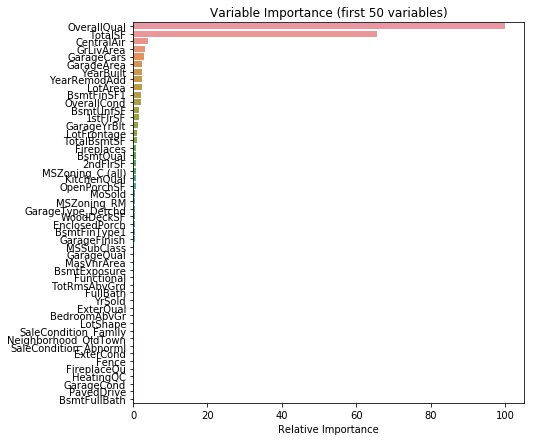

In [620]:
# features relative importance: comparing feature importance with respect to the most important one

feature_importance = 100 * (feature_importance / feature_importance.max())
sorted_index = np.argsort(feature_importance)
featimp = feature_importance[sorted_index]
feat = X_train.columns[sorted_index]
pos = np.arange(sorted_index.shape[0]) + .5

a = 0 
b = 50 #To limit the number of features
c = b - a

featimp= featimp[::-1][a:b]
feat = feat[::-1][a:b]
pos = pos[::-1][a:b]

fig = plt.figure(figsize=(7,7))
plt.subplot2grid((1,1), (0,0))
with sns.axes_style("white"):
    ax = sns.barplot(y=feat, x=featimp)
plt.xlabel('Relative Importance')
plt.title('Variable Importance (first {0} variables)'.format(c))
plt.show()

In [624]:
#Comparing the scores of different Regression models: RandomForest, Bagging,ExtraTrees, AdaBoost,
# Gradient Boosting
def check_classifiers(X, y):
    """
    Returns a sorted list of accuracy scores from fitting and scoring passed data
    against several algorithms.
    """
    params = 100
    _cv = kf
    classifier_score = {}
    
    scores = cv.cross_val_score(RandomForestRegressor(n_estimators=params), X, y, cv=10)
    classifier_score['Random Forest Regressor'] = scores.mean()
    
    scores = cv.cross_val_score(BaggingRegressor(n_estimators=params), X, y, cv=10)
    classifier_score['Bagging Regressor'] = scores.mean()
    
    scores = cv.cross_val_score(ExtraTreesRegressor(n_estimators=params), X, y, cv=10)
    classifier_score['ExtraTrees Regressor'] = scores.mean()
    
    scores = cv.cross_val_score(AdaBoostRegressor(n_estimators=params), X, y, cv=10)
    classifier_score['AdaBoost Regressor'] = scores.mean()
    
    scores = cv.cross_val_score(GradientBoostingRegressor(n_estimators=params), X, y, cv=10)
    classifier_score['Gradient Boost Regressor'] = scores.mean()

    #return sorted(classifier_score.items(), key=operator.itemgetter(1), reverse=True)
    return sorted(classifier_score.items(), reverse=True)

check_classifiers(X_train, y_train)

KeyboardInterrupt: 

In [622]:
#Model_RandomForest = RandomForestRegressor(n_estimators=100)
#Model_Random_Forest.fit(X_train,y_train)


In [623]:
# Determine ‘optimal’ number of components
# I modified this frequently and it took alot of time for each iteration.. but at the end I chose
# the ranges that gives the lowest neg_mean_square_error.
model_rf2 = GradientBoostingRegressor()

gs = grid_search.GridSearchCV(
    estimator=model_rf2,
    param_grid={'loss': ['ls', 'huber'],
                'learning_rate': [0.001],
                'n_estimators': np.arange(1000,10000,1000),
                'max_depth': [2]
                },
    scoring='neg_mean_squared_error',
    cv=10
    )

gs.fit(X_train, y_train)


gs.grid_scores_

KeyboardInterrupt: 

In [625]:
print('Lowest mean squared error = ', gs.best_score_)

gs.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [218]:
from math import sqrt
sqrt(-gs.best_score_)

0.12126387105165913

In [245]:
# Depending on the Classifier scores.. Gradient Boosting was chosen.4 gradient boosting models
#were created
#HyperParameter Tuning for Gradient Boosting Regression
model_GradientBoostingRegression = GradientBoostingRegressor()

gs = grid_search.GridSearchCV(
    estimator=model_rf2,
    param_grid={'loss': ['huber'],
                'learning_rate': [0.0048],
                'n_estimators': [14800],
                'max_depth': [3]
                },
    scoring='neg_mean_squared_error',
    cv=10
    )

gs.fit(X_train, y_train)


gs.grid_scores_

[mean: -0.01411, std: 0.00394, params: {'learning_rate': 0.0048, 'loss': 'huber', 'max_depth': 3, 'n_estimators': 14800}]

In [626]:
# GradientBoosting Regression Model1 with the right parameters 
Model_GradientBoostingRegression_1= GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.0048, loss='huber',
             max_depth=2, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=14800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Model_GradientBoostingRegression_1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.0048, loss='huber', max_depth=2,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=14800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [454]:
Model_GradientBoostingRegression_2 = GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.0048, loss='huber',
             max_depth=1, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=14800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Model_GradientBoostingRegression_2.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.0048, loss='huber', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=14800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [455]:
Model_GradientBoostingRegression_3 = GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.0048, loss='huber',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=14800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Model_GradientBoostingRegression_3.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.0048, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=14800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [489]:
Model_GradientBoostingRegression_4 = GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.0048, loss='huber',
             max_depth=4, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=14800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Model_GradientBoostingRegression_4.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.0048, loss='huber', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=14800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [627]:
scores = cv.cross_val_score(Model_GradientBoostingRegression_1, X_train, y_train, cv=10)
scores.mean()
scores = cv.cross_val_score(Model_GradientBoostingRegression_2, X_train, y_train, cv=10)
scores.mean()
scores = cv.cross_val_score(Model_GradientBoostingRegression_3, X_train, y_train, cv=10)
scores.mean()
scores = cv.cross_val_score(Model_GradientBoostingRegression_4, X_train, y_train, cv=10)
scores.mean()

KeyboardInterrupt: 

In [490]:
y_predict1_GradientBoostingRegression = Model_GradientBoostingRegression_1.predict(X_test)
y_predict2_GradientBoostingRegression = Model_GradientBoostingRegression_2.predict(X_test)
y_predict3_GradientBoostingRegression = Model_GradientBoostingRegression_3.predict(X_test)
y_predict4_GradientBoostingRegression = Model_GradientBoostingRegression_4.predict(X_test)

In [491]:
y_test
y1_Gradient = np.exp(y_predict1_GradientBoostingRegression)
y2_Gradient = np.exp(y_predict2_GradientBoostingRegression)
y3_Gradient = np.exp(y_predict3_GradientBoostingRegression)
y4_Gradient = np.exp(y_predict4_GradientBoostingRegression)

print(len(X_train))
print(len(y_train))
print(len(y_predict))
print(len(y1_Gradient))
y1_Gradient

1458
1458
1459
1459


array([ 122538.95823416,  166400.90148337,  191105.34876588, ...,
        155067.17223436,  117272.31045211,  216902.20119711])

In [610]:
#train_diag = X_train.join(y_train)
#train_diag['dataset'] = 'train'

#test_diag = X_train
#test_diag['SalePrice'] = y
#test_diag['dataset'] = 'test'


#total_diag = pd.concat([train_diag, test_diag])



#fig = plt.figure(figsize=(6,15))

#plt.subplot2grid((2,1), (0,0))
#with sns.axes_style("white"):
  #  sns.violinplot(x='OverallQual', y='SalePrice', hue='dataset', data=total_diag, split=True,
 #              inner='quart', palette={'train': 'r', 'test': 'y'})
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.xlabel('Overall quality')
#plt.ylabel('Sale price')
#plt.title('Sale price and overall quality')

#plt.show()

In [515]:
#Model_Ridge
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")
cv_ridge.min()

0.11573258989367648

In [513]:
model_ridge =RidgeCV().fit(X_train,y_train)


In [375]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train,y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [488]:
#Model_Lasso
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
print(rmse_cv(model_lasso))
rmse_cv(model_lasso).mean()

[ 0.10524831  0.11627766  0.12700789  0.10852312  0.11006423]


0.11342424408311473

In [389]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [390]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 95 variables and eliminated the other 125 variables


In [391]:
#imp_coef = pd.concat([coef.sort_values().head(10),
#                     coef.sort_values().tail(10)])

#matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
#imp_coef.plot(kind = "barh")
#plt.title("Coefficients in the Lasso Model")


Text(0.5,1,'Coefficients in the Lasso Model')

In [392]:
#let's look at the residuals as well:
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

#preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y_train})
#preds["residuals"] = preds["true"] - preds["preds"]
#preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [423]:

lasso_preds = np.expm1(model_lasso.predict(X_test))
ridge_preds =np.expm1(model_ridge.predict(X_test))

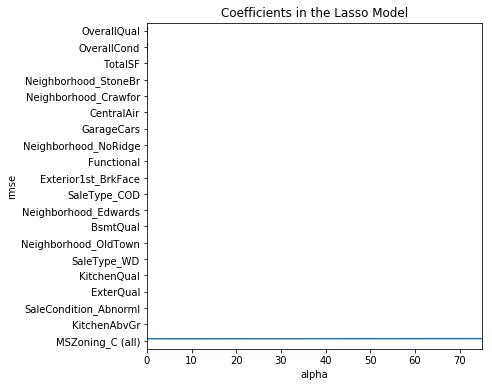

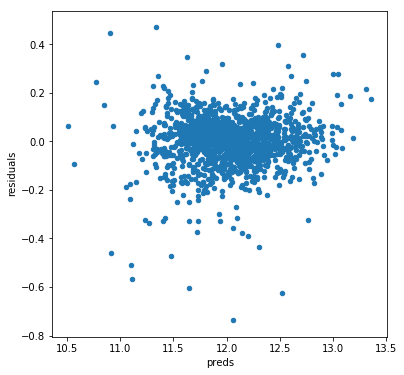

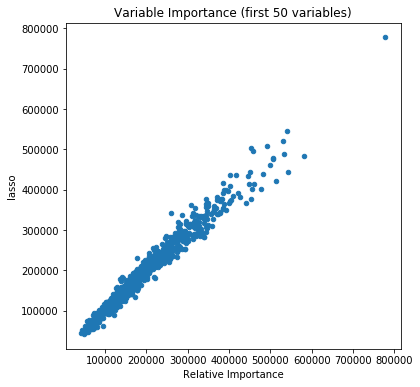

In [383]:
predictions = pd.DataFrame({"gbm":Model_GradientBoostingRegression_1, "lasso":lasso_preds})


predictions.plot(x = "gbm", y = "lasso", kind = "scatter")

plt.xlabel('Relative Importance')
plt.title('Variable Importance (first {0} variables)'.format(c))
plt.show()

In [446]:
lasso_preds

array([ 121399.68297285,  157985.65254428,  183645.11283799, ...,
        174811.90512721,  113306.9967582 ,  227383.07501768])

In [550]:
#from sklearn.linear_model import LinearRegression
#lr = LinearRegression(
 #   n_jobs = -1
#)
#model = StackingRegressor(
#    regressors=[model_rf3,model_lasso, model_ridge],
#    meta_regressor=lr
#)

# Fit the model on our data
#model.fit(X_train, y_train)



# Predict test set
#Y_pred_Stack = model.predict(X_test)

In [611]:
ensemble = ((lasso_preds +  ridge_preds)/2 + (y1_Gradient+y2_Gradient)/2)/2

NameError: name 'y1_Gradient' is not defined

In [607]:
print(y1_Gradient)
print(y2_Gradient)
y3_Gradient
ensemble

[ 121945.66736338  163025.65635563  194554.88597117 ...,  182211.40604852
  121618.69918396  228472.99106444]
[ 127549.36993065  170390.02334211  194634.13598476 ...,  156387.51121534
  114404.95074362  227105.7960702 ]


array([ 121323.0645706 ,  161103.03785688,  188615.62052075, ...,
        172095.67978917,  117074.14558094,  223582.10027502])

In [608]:
Submission = pd.DataFrame({'Id':list(range(1461,2920,1)),'SalePrice':ensemble})
Submission.to_csv('Trial.csv', index=False)